In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Combined Data\Combined_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\O\AppData\Local\Temp\ipykernel_9848\468677050.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv("Combined Data\Combined_dataset.csv")


In [3]:
df.head()

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,Canada,SE649035-145565,River,12-01-1974,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent
1,Canada,SE649035-145565,River,12-01-1975,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent
2,Canada,SE649035-145565,River,12-01-1976,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent
3,Canada,SE649035-145565,River,12-01-1977,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent
4,Canada,SE649035-145565,River,12-01-1978,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827977 entries, 0 to 2827976
Data columns (total 14 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Country                           object 
 1   Area                              object 
 2   Waterbody Type                    object 
 3   Date                              object 
 4   Ammonia (mg/l)                    float64
 5   Biochemical Oxygen Demand (mg/l)  float64
 6   Dissolved Oxygen (mg/l)           float64
 7   Orthophosphate (mg/l)             float64
 8   pH (ph units)                     float64
 9   Temperature (cel)                 float64
 10  Nitrogen (mg/l)                   float64
 11  Nitrate (mg/l)                    float64
 12  CCME_Values                       float64
 13  CCME_WQI                          object 
dtypes: float64(9), object(5)
memory usage: 302.1+ MB


In [5]:
df.isnull().sum()

Country                             0
Area                                0
Waterbody Type                      0
Date                                0
Ammonia (mg/l)                      0
Biochemical Oxygen Demand (mg/l)    0
Dissolved Oxygen (mg/l)             0
Orthophosphate (mg/l)               0
pH (ph units)                       0
Temperature (cel)                   0
Nitrogen (mg/l)                     0
Nitrate (mg/l)                      0
CCME_Values                         0
CCME_WQI                            0
dtype: int64

In [6]:
df["CCME_WQI"].value_counts()

CCME_WQI
Good         1033709
Excellent    1020710
Marginal      328734
Fair          317856
Poor          126968
Name: count, dtype: int64

<Axes: xlabel='CCME_WQI'>

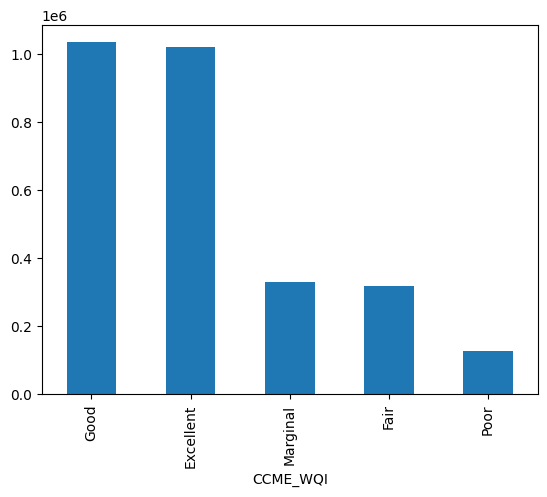

In [7]:
df["CCME_WQI"].value_counts().plot(kind="bar")

<Axes: xlabel='CCME_WQI'>

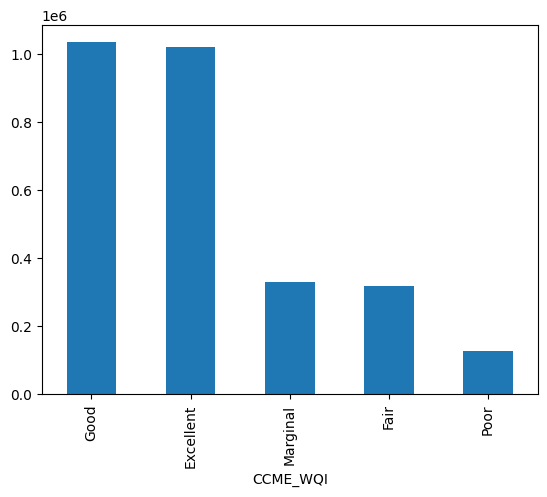

In [8]:
df["CCME_WQI"].value_counts().plot(kind="bar")

In [9]:
corr_data=df.select_dtypes(include="number").corr()

<Axes: >

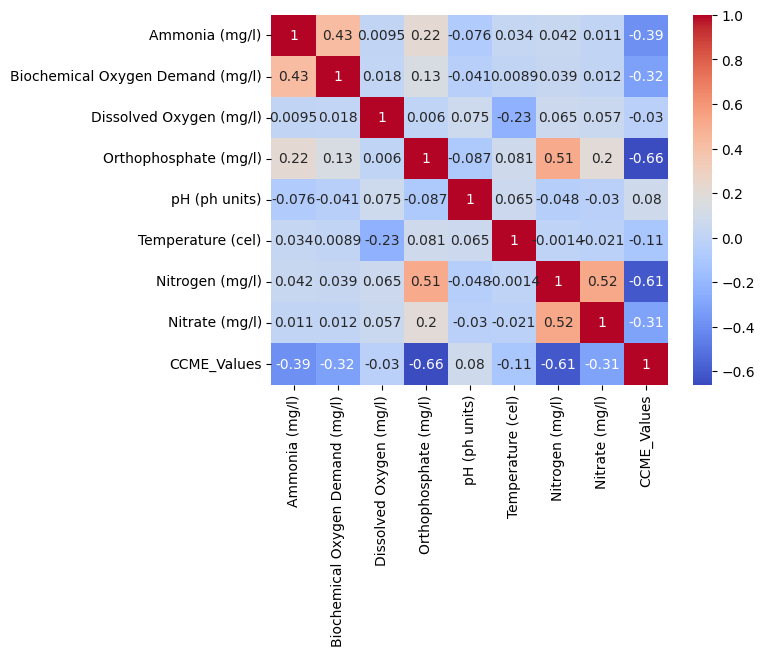

In [10]:
sns.heatmap(corr_data, annot=True, cmap='coolwarm')


In [11]:
df.duplicated().sum()

np.int64(9971)

In [12]:
df[df.duplicated()]
  
duplicates_grouped = df.groupby(list(df.columns)).size().reset_index(name='count')

 
duplicates_grouped[duplicates_grouped['count'] > 1]

 


,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI,count
94,Canada,CHRW-1339,River,12-01-2005,0.051060,0.930000,10.2160,0.0127,8.3167,10.9500,1.664290,5.245995,100.000000,Excellent,2
95,Canada,CHRW-1345,River,12-01-1999,0.137558,1.520000,10.5250,0.0124,8.3133,19.6667,1.245670,4.249920,100.000000,Excellent,2
96,Canada,CHRW-1345,River,12-01-2000,0.121072,1.500000,10.2500,0.1022,8.1975,11.6583,0.636642,4.382730,91.774842,Good,2
97,Canada,CHRW-1345,River,12-01-2001,0.177699,1.545390,9.0750,0.0230,8.1725,11.4250,12.500000,13.731226,100.000000,Excellent,2
98,Canada,CHRW-1345,River,12-01-2002,0.052107,0.558333,10.2167,0.0114,8.1700,10.7583,0.636364,5.091050,100.000000,Excellent,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817361,USA,Yuba,River,16-01-1962,0.021000,1.600000,9.8700,0.0400,7.8000,11.1000,0.400000,0.900000,100.000000,Excellent,2
2817416,USA,Yuba,River,16-12-1976,0.021000,1.600000,9.8700,0.0400,7.8000,11.1000,0.400000,0.900000,100.000000,Excellent,2
2817527,USA,Yuba,River,20-02-1962,0.021000,1.600000,9.8700,0.0400,7.3000,11.1000,0.400000,0.900000,100.000000,Excellent,2
2817531,USA,Yuba,River,20-02-2003,0.021000,1.600000,9.8700,0.0400,7.8000,1.4000,0.400000,0.900000,100.000000,Excellent,2


In [13]:
df.isna().sum()

Country                             0
Area                                0
Waterbody Type                      0
Date                                0
Ammonia (mg/l)                      0
Biochemical Oxygen Demand (mg/l)    0
Dissolved Oxygen (mg/l)             0
Orthophosphate (mg/l)               0
pH (ph units)                       0
Temperature (cel)                   0
Nitrogen (mg/l)                     0
Nitrate (mg/l)                      0
CCME_Values                         0
CCME_WQI                            0
dtype: int64

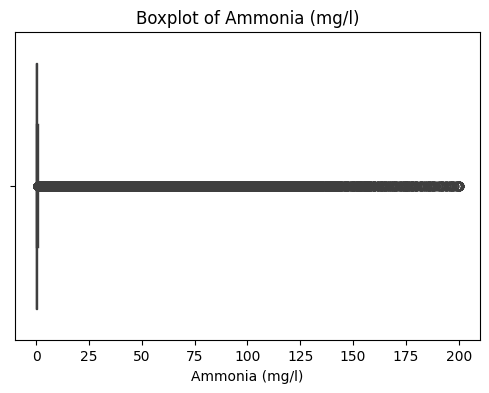

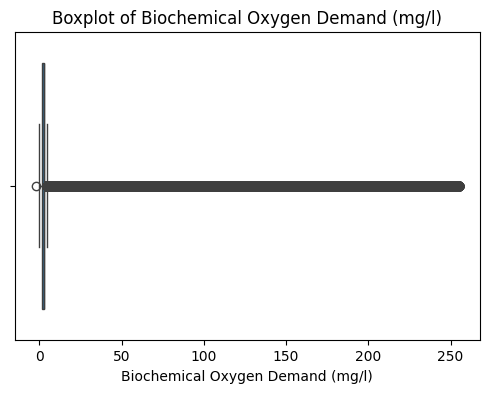

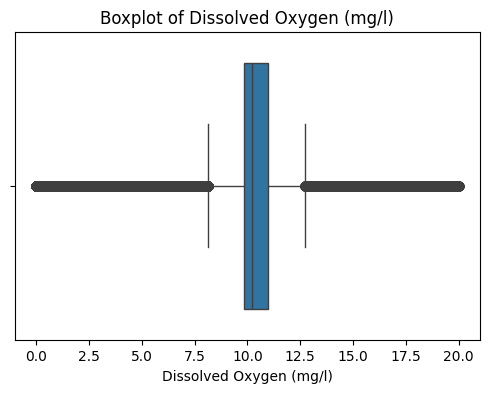

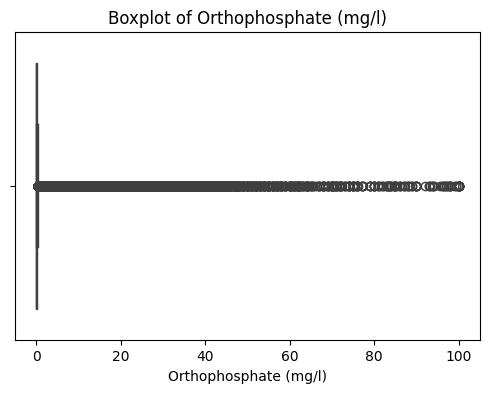

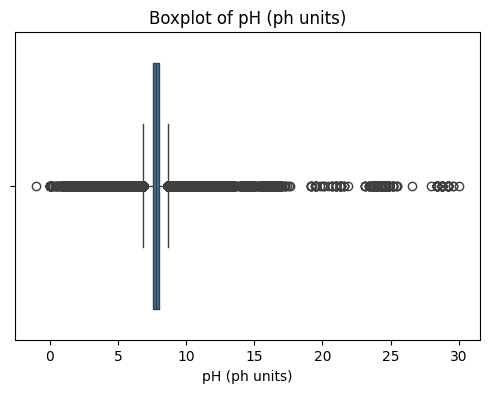

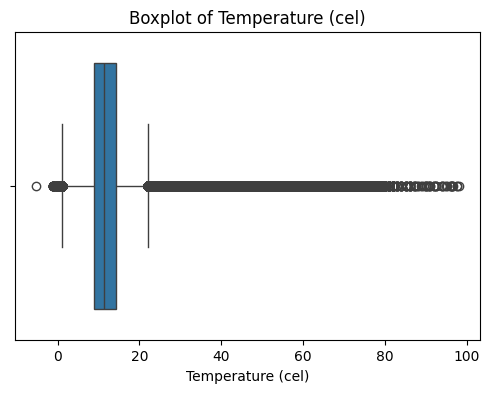

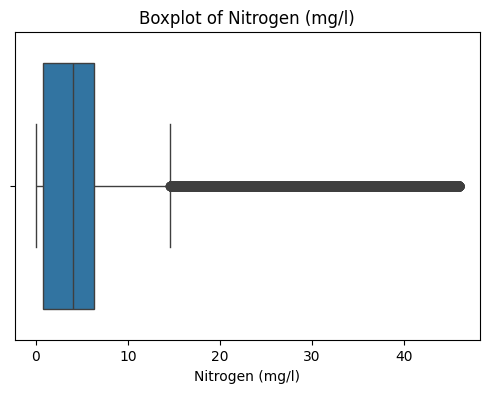

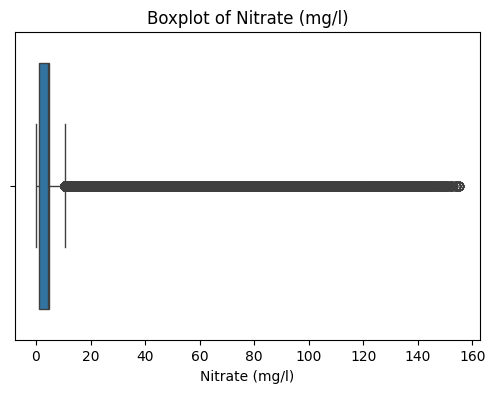

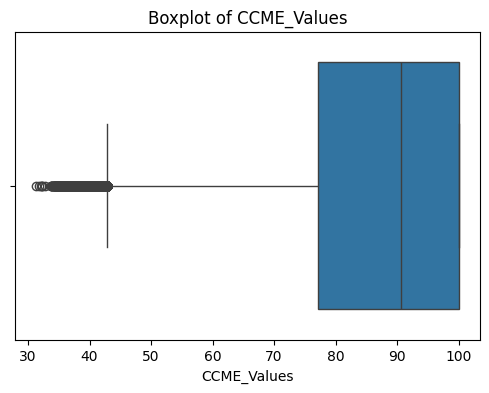

In [14]:
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Value counts for Country:
Country
England    2129198
USA         413814
Ireland     235019
China        45997
Canada        3949
Name: count, dtype: int64


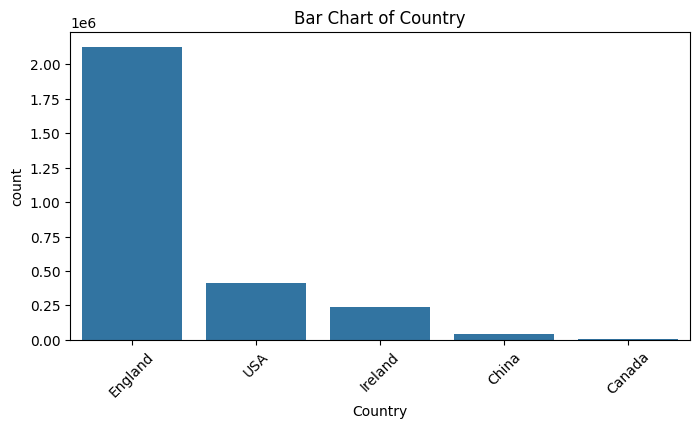


Value counts for Area:
Area
Lake Washington        54281
Hou Bay                45997
Lake Sammamish         26818
Central Puget Sound    22499
Los Angeles            21478
                       ...  
ES070ESPFBENI1             1
FRHR03105500               1
BADERANSKO-JEZERO          1
FISW_602                   1
DESM_DENI_48162282         1
Name: count, Length: 61689, dtype: int64


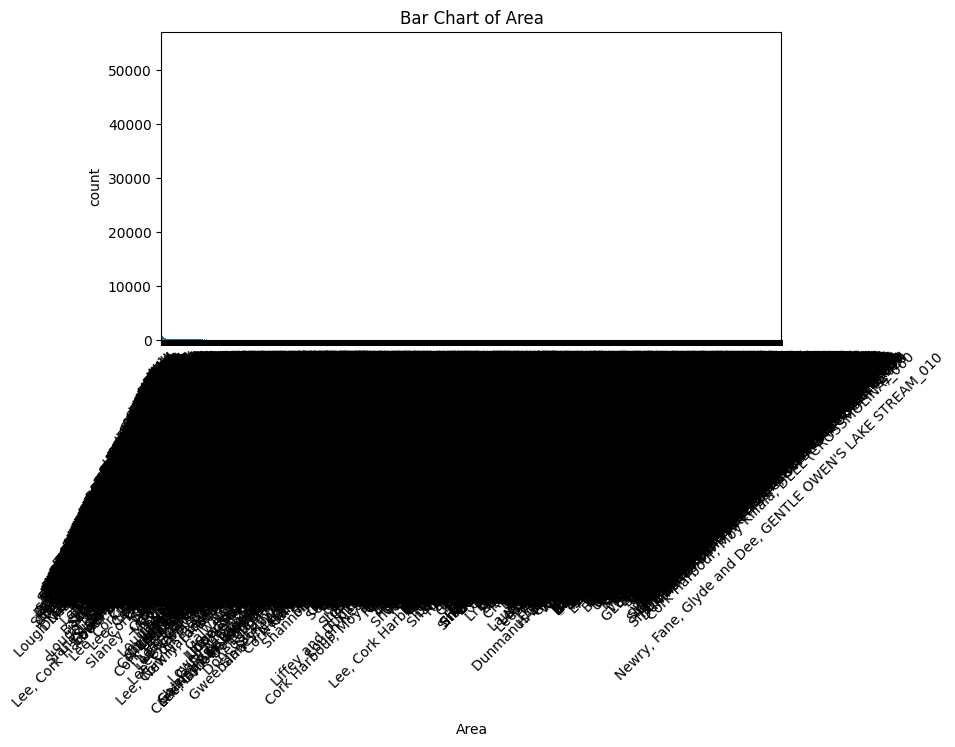


Value counts for Waterbody Type:
Waterbody Type
River           1852579
Effluent         601550
Lake             153603
Estuarine         49375
Bay               45997
Sea Water         32061
Canal             28574
Sewage            23777
Marine            23162
Drainage          10205
Transitional       4275
Coastal            2819
Name: count, dtype: int64


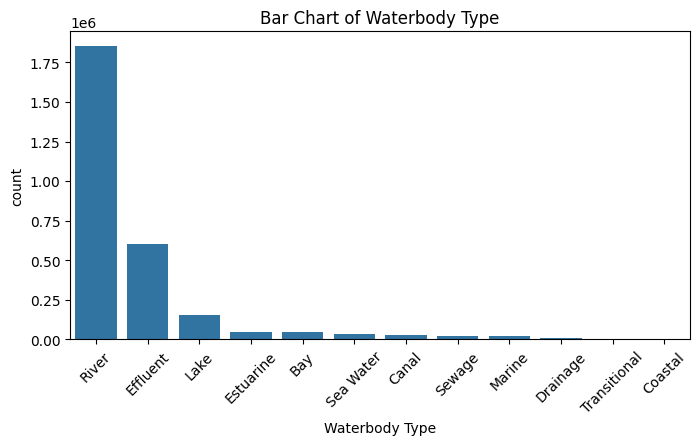


Value counts for Date:
Date
13-11-2008    922
12-03-2018    894
25-11-2013    881
19-11-2013    851
05-03-2014    837
             ... 
18-05-1996      1
23-12-2017      1
15-07-2023      1
23-10-1977      1
11-05-1994      1
Name: count, Length: 23876, dtype: int64


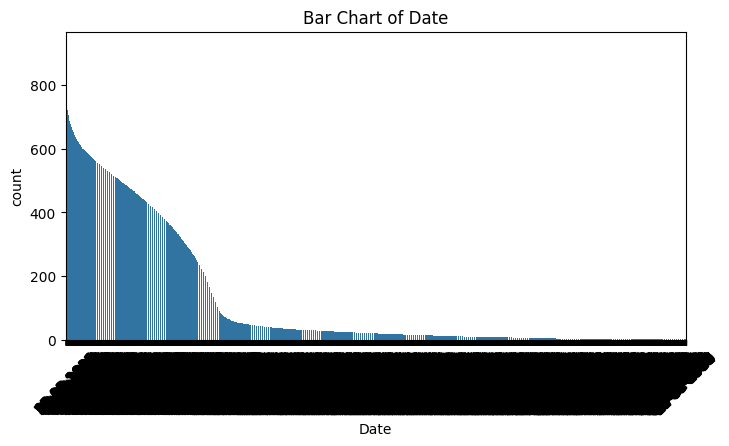


Value counts for CCME_WQI:
CCME_WQI
Good         1033709
Excellent    1020710
Marginal      328734
Fair          317856
Poor          126968
Name: count, dtype: int64


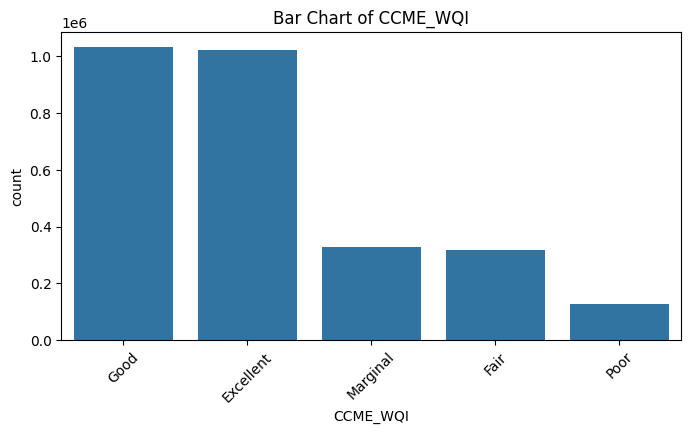

In [15]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

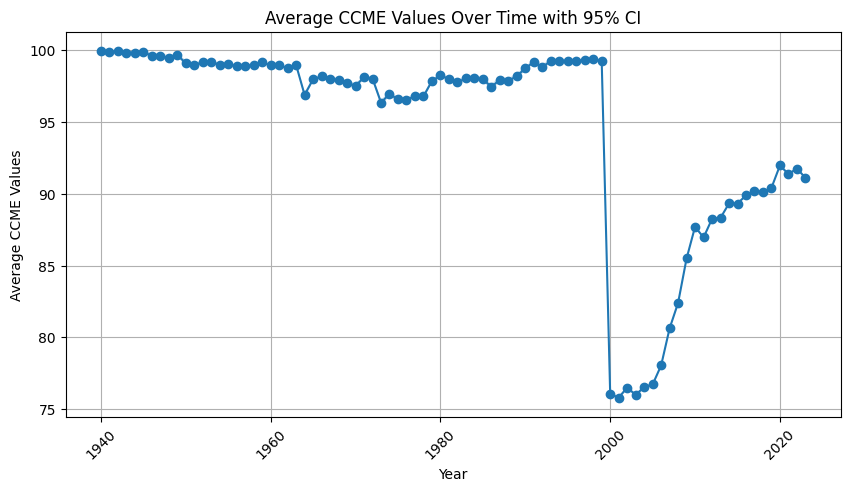

In [16]:
 

 
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

 
df["CCME_Values"] = pd.to_numeric(df["CCME_Values"], errors="coerce")

 
df["Year"] = df["Date"].dt.year

 
agg = df.groupby("Year")["CCME_Values"].agg(["mean","std","count"]).dropna()

 
agg["sem"] = agg["std"] / np.sqrt(agg["count"])
agg["ci95_low"] = agg["mean"] - 1.96 * agg["sem"]
agg["ci95_high"] = agg["mean"] + 1.96 * agg["sem"]

 
plt.figure(figsize=(10,5))
plt.plot(agg.index, agg["mean"], marker="o")
plt.fill_between(agg.index, agg["ci95_low"], agg["ci95_high"], alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Average CCME Values")
plt.title("Average CCME Values Over Time with 95% CI")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


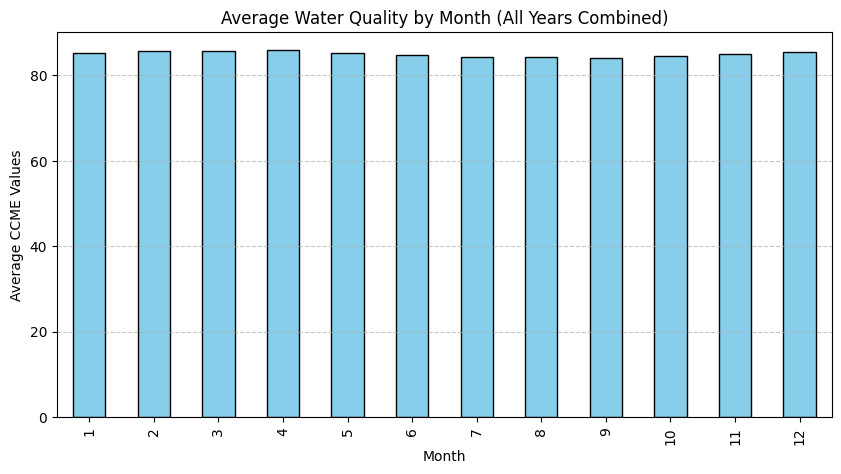

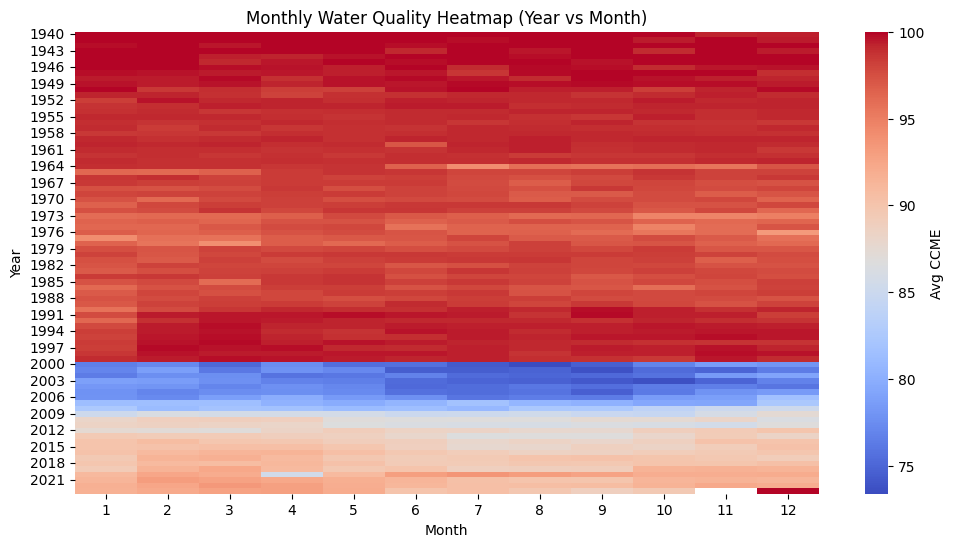

In [17]:

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
 
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

 
monthly_quality = df.groupby("Month")["CCME_Values"].mean()
plt.figure(figsize=(10, 5))
monthly_quality.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Average CCME Values")
plt.title("Average Water Quality by Month (All Years Combined)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


pivot = df.pivot_table(
    index="Year",
    columns="Month",
    values="CCME_Values",
    aggfunc="mean"
)

 
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="coolwarm", annot=False, cbar_kws={'label': 'Avg CCME'})
plt.title("Monthly Water Quality Heatmap (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


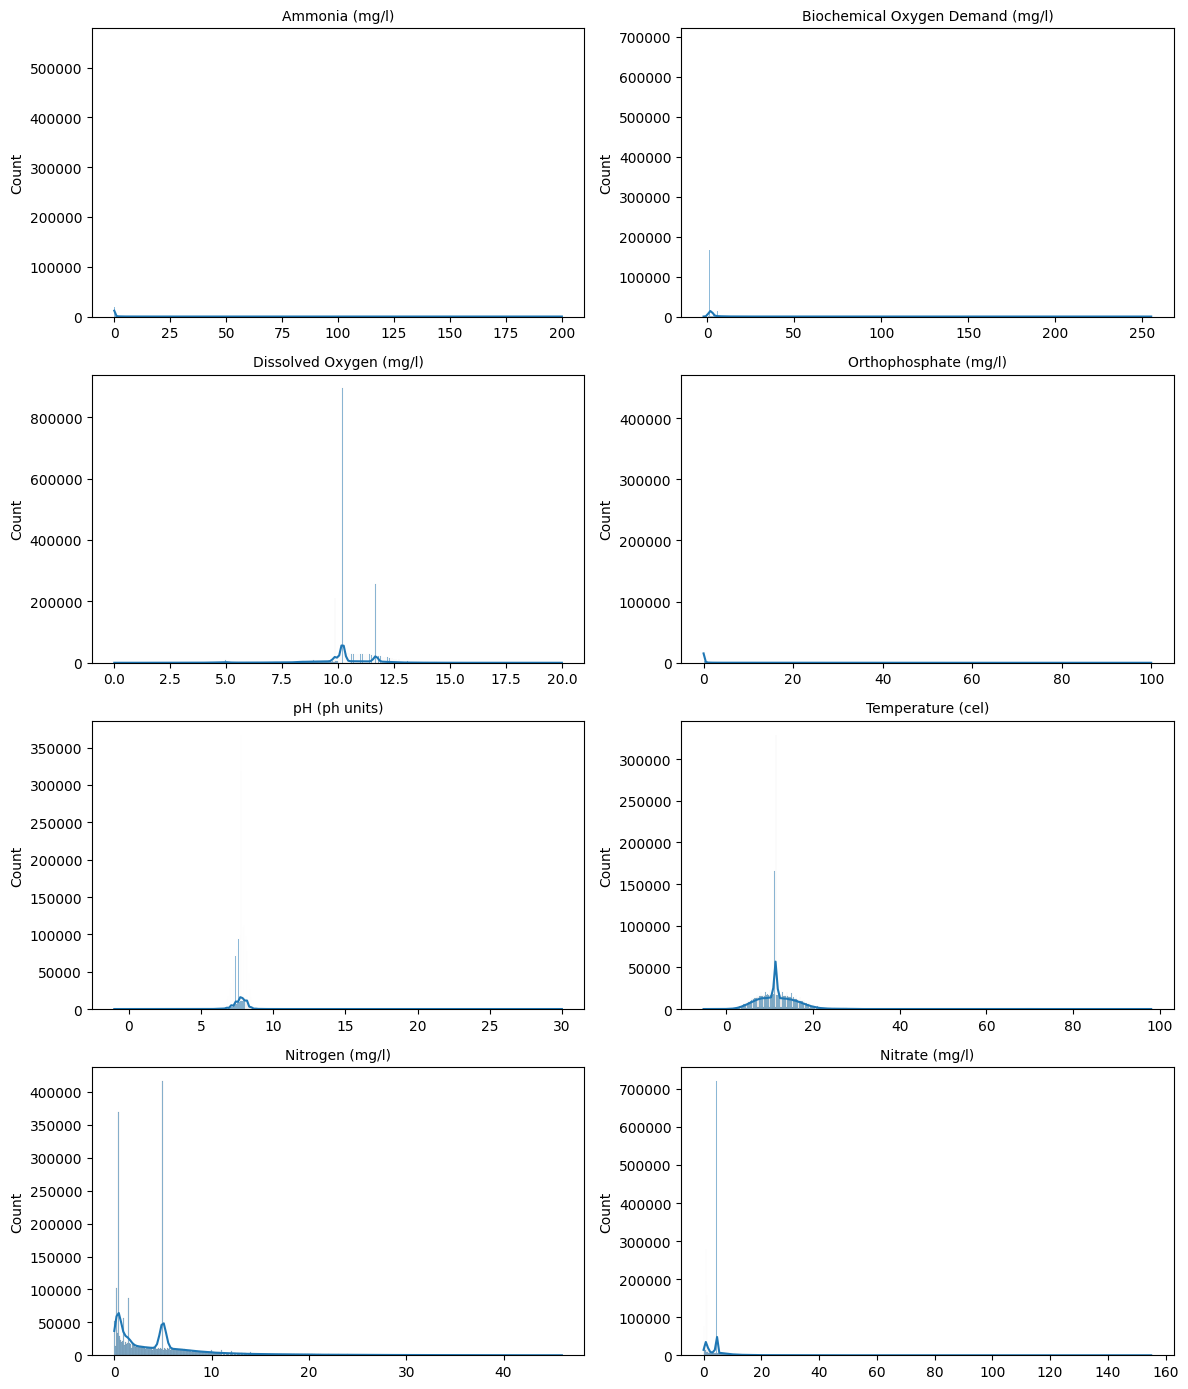

In [18]:
 

 
features = [
    "Ammonia (mg/l)", 
    "Biochemical Oxygen Demand (mg/l)",
    "Dissolved Oxygen (mg/l)", 
    "Orthophosphate (mg/l)",
    "pH (ph units)", 
    "Temperature (cel)", 
    "Nitrogen (mg/l)", 
    "Nitrate (mg/l)"
]

 
n_rows = 4
n_cols = 2

 
plt.figure(figsize=(12, 14))

 
for i, col in enumerate(features, 1):    
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col}", fontsize=10)
    plt.xlabel("")  
    plt.ylabel("Count")

plt.tight_layout()   
plt.show()


In [19]:
 
valid_ranges = {
    "Ammonia (mg/l)": (0, 20),
    "Biochemical Oxygen Demand (mg/l)": (0, 50),
    "Dissolved Oxygen (mg/l)": (2, 30),
    "Orthophosphate (mg/l)": (0, 10),
    "pH (ph units)": (4, 11),
    "Temperature (cel)": (0, 60),
    "Nitrogen (mg/l)": (0, 50),
    "Nitrate (mg/l)": (0, 100),
    "CCME_Values": (0, 100)
}

 
mask_valid = pd.Series(True, index=df.index)

for col, (low, high) in valid_ranges.items():
    mask_valid &= df[col].between(low, high, inclusive="both")

 
df_clean = df[mask_valid].copy()

 
print("Before cleaning:", df.shape[0], "rows")
print("After cleaning:", df_clean.shape[0], "rows")
print("Removed:", df.shape[0] - df_clean.shape[0], "illogical rows")

Before cleaning: 2827977 rows
After cleaning: 2734630 rows
Removed: 93347 illogical rows


In [20]:
df_clean

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI,Year,Month
0,Canada,SE649035-145565,River,1974-01-12,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent,1974,1
1,Canada,SE649035-145565,River,1975-01-12,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent,1975,1
2,Canada,SE649035-145565,River,1976-01-12,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent,1976,1
3,Canada,SE649035-145565,River,1977-01-12,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent,1977,1
4,Canada,SE649035-145565,River,1978-01-12,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent,1978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827972,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2022-06-21,0.024000,1.40,4.2930,0.025000,7.90000,16.200,0.370000,0.37000,100.0,Excellent,2022,6
2827973,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2022-09-28,0.038000,1.40,4.4955,0.025000,7.90000,11.400,0.540000,0.54000,100.0,Excellent,2022,9
2827974,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2022-11-29,0.035000,1.40,4.4640,0.016000,7.60000,6.200,0.800000,0.79000,100.0,Excellent,2022,11
2827975,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2023-02-07,0.046000,1.40,4.1760,0.012000,8.00000,7.800,0.950000,1.30000,100.0,Excellent,2023,2


In [21]:
df_clean = df_clean.drop_duplicates()

 
print("Number of rows after removing duplicates:", df_clean.shape[0])

Number of rows after removing duplicates: 2724675


In [22]:
df_clean['CCME_WQI'] = df_clean['CCME_WQI'].replace({'Marginal': 'Non-Potable Water', 'Poor': 'Non-Potable Water'}) 

C:\Users\O\AppData\Local\Temp\ipykernel_9848\1894763958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CCME_WQI'] = df_clean['CCME_WQI'].replace({'Marginal': 'Non-Potable Water', 'Poor': 'Non-Potable Water'})


<Axes: xlabel='CCME_WQI'>

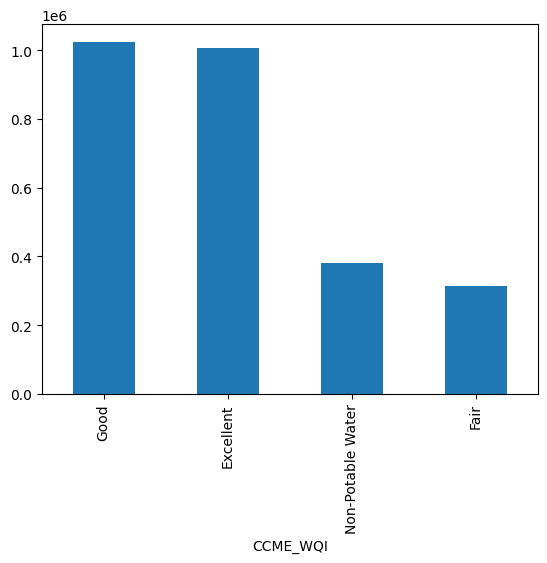

In [23]:
df_clean["CCME_WQI"].value_counts().plot(kind="bar")

In [24]:
 
df_clean['Waterbody Type'] = df_clean['Waterbody Type'].replace({
    'Marine': 'Coastal/Marine',
    'Sea Water': 'Coastal/Marine',
    'Coastal': 'Coastal/Marine',
    'Estuarine': 'Coastal/Marine',
    'Sewage': 'Wastewater',
    'Effluent': 'Wastewater',
    'Canal': 'Artificial',
    'Drainage': 'Artificial',
    'Bay': 'Minor Waterbodies',
    'Artificial': 'Minor Waterbodies',
    'Transitional': 'Minor Waterbodies'
})

 
df_encoded = pd.get_dummies(df_clean, columns=['Waterbody Type'],dtype="int")



C:\Users\O\AppData\Local\Temp\ipykernel_9848\705561465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Waterbody Type'] = df_clean['Waterbody Type'].replace({


In [25]:
df_clean['Waterbody Type'].value_counts()

Waterbody Type
River                1819056
Wastewater            567289
Lake                  146316
Coastal/Marine        105160
Minor Waterbodies      49613
Artificial             37241
Name: count, dtype: int64

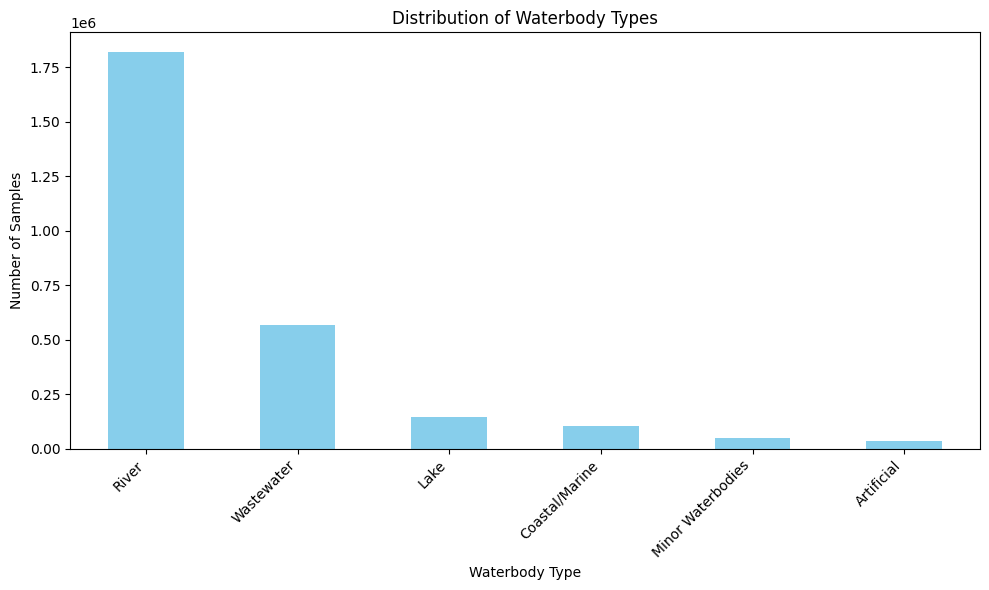

In [26]:
distribution =  df_clean['Waterbody Type'].value_counts()


plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Waterbody Types')
plt.xlabel('Waterbody Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df_encoded

,Country,Area,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),...,CCME_Values,CCME_WQI,Year,Month,Waterbody Type_Artificial,Waterbody Type_Coastal/Marine,Waterbody Type_Lake,Waterbody Type_Minor Waterbodies,Waterbody Type_River,Waterbody Type_Wastewater
0,Canada,SE649035-145565,1974-01-12,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,...,100.0,Excellent,1974,1,0,0,0,0,1,0
1,Canada,SE649035-145565,1975-01-12,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,...,100.0,Excellent,1975,1,0,0,0,0,1,0
2,Canada,SE649035-145565,1976-01-12,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,...,100.0,Excellent,1976,1,0,0,0,0,1,0
3,Canada,SE649035-145565,1977-01-12,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,...,100.0,Excellent,1977,1,0,0,0,0,1,0
4,Canada,SE649035-145565,1978-01-12,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,...,100.0,Excellent,1978,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827972,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2022-06-21,0.024000,1.40,4.2930,0.025000,7.90000,16.200,0.370000,...,100.0,Excellent,2022,6,0,0,0,0,1,0
2827973,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2022-09-28,0.038000,1.40,4.4955,0.025000,7.90000,11.400,0.540000,...,100.0,Excellent,2022,9,0,0,0,0,1,0
2827974,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2022-11-29,0.035000,1.40,4.4640,0.016000,7.60000,6.200,0.800000,...,100.0,Excellent,2022,11,0,0,0,0,1,0
2827975,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2023-02-07,0.046000,1.40,4.1760,0.012000,8.00000,7.800,0.950000,...,100.0,Excellent,2023,2,0,0,0,0,1,0


In [ ]:
class_order = ["Non-Potable Water", "Fair", "Good", "Excellent"]
cat_type = pd.CategoricalDtype(categories=class_order, ordered=True)

y_cat = df_encoded["CCME_WQI"].astype(cat_type)
y_int = y_cat.cat.codes.values

mask_valid = (y_int >= 0) & (y_int < len(class_order))
if not np.all(mask_valid):
    print(f"  Deleted {np.sum(~mask_valid)} Invalid rows in y")
    df_encoded = df_encoded.loc[mask_valid].reset_index(drop=True)
    y_int = y_int[mask_valid]


In [ ]:
X = df_encoded.drop(columns=["CCME_WQI", "Country", "Area", "Date", "Year", "CCME_Values"])
y = y_int

In [ ]:
n = len(X)
train_size = int(0.7 * n)
val_size   = int(0.15 * n)

X_train = X.iloc[:train_size]
X_val   = X.iloc[train_size:train_size + val_size]
X_test  = X.iloc[train_size + val_size:]

y_train = y[:train_size]
y_val   = y[train_size:train_size + val_size]
y_test  = y[train_size + val_size:]

print("Labels ranges check:")
print("Train:", y_train.min(), y_train.max())
print("Val:", y_val.min(), y_val.max())
print("Test:", y_test.min(), y_test.max())

In [ ]:
num_features = [
    "Ammonia (mg/l)", "Biochemical Oxygen Demand (mg/l)",
    "Dissolved Oxygen (mg/l)", "Orthophosphate (mg/l)",
    "pH (ph units)", "Temperature (cel)",
    "Nitrogen (mg/l)", "Nitrate (mg/l)"
]
cat_features = [col for col in X.columns if col not in num_features]


In [ ]:
numeric_transformer = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed   = preprocessor.transform(X_val)
X_test_processed  = preprocessor.transform(X_test)

print(" Shape after preprocessing:", X_train_processed.shape)


In [ ]:

seq_len = 15

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=1):
        self.seq_len = seq_len
        self.y_full = torch.tensor(y, dtype=torch.long)
        X_t = torch.tensor(X, dtype=torch.float32)

        if len(X_t) < seq_len:
            raise ValueError("Sequence length")

        X_seq, y_seq = [], []
        for i in range(len(X_t) - seq_len + 1):
            X_seq.append(X_t[i:i+seq_len])
            y_seq.append(self.y_full[i + seq_len - 1])
        self.X = torch.stack(X_seq)
        self.y = torch.tensor(y_seq, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TimeSeriesDataset(X_train_processed, y_train, seq_len=seq_len)
val_ds   = TimeSeriesDataset(X_val_processed, y_val, seq_len=seq_len)
test_ds  = TimeSeriesDataset(X_test_processed, y_test, seq_len=seq_len)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=256, shuffle=False)

In [ ]:

class DualPatchTransformerClassifier(nn.Module):
    def __init__(self,
                 input_dim,
                 d_model=64,
                 nhead=4,
                 num_layers=2,
                 num_classes=4,
                 dropout=0.1,
                 max_seq_len=100):
        super().__init__()
        self.d_model = d_model
        self.input_proj = nn.Linear(input_dim, d_model)
        self.pos_embedding = nn.Parameter(torch.zeros(1, max_seq_len, d_model))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Dropout(dropout),
            nn.Linear(d_model, num_classes)
        )

    def forward(self, x):
        seq_len = x.size(1)
        x = self.input_proj(x)                     
        x = x + self.pos_embedding[:, :seq_len, :]   
        encoded = self.transformer(x)               
        rep = encoded[:, -1, :]                     
        logits = self.classifier(rep)               
        return logits

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DualPatchTransformerClassifier(
    input_dim=X_train_processed.shape[1],
    d_model=128,
    nhead=4,
    num_layers=2,
    num_classes=len(class_order),
    dropout=0.1,
    max_seq_len=seq_len
).to(device)


train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_losses, val_losses = [], []
train_accs, val_accs = [], []

num_epochs = 20
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.long().to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X_batch.size(0)
        preds = torch.argmax(logits, dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
    train_loss = total_loss / total
    train_acc  = correct / total
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.long().to(device)
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            total_loss += loss.item() * X_batch.size(0)
            preds = torch.argmax(logits, dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    val_loss = total_loss / total
    val_acc  = correct / total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch}: TrainLoss={train_loss:.4f}, TrainAcc={train_acc:.4f}, ValLoss={val_loss:.4f}, ValAcc={val_acc:.4f}")

Labels ranges check:
Train: 0 3
Val: 0 3
Test: 0 3
✅ Shape after preprocessing: (1907272, 32)
Epoch 1: TrainLoss=0.0911, TrainAcc=0.9607, ValLoss=0.3186, ValAcc=0.9309
Epoch 2: TrainLoss=0.0616, TrainAcc=0.9734, ValLoss=0.3245, ValAcc=0.9332
Epoch 3: TrainLoss=0.0536, TrainAcc=0.9769, ValLoss=0.0718, ValAcc=0.9718
Epoch 4: TrainLoss=0.0484, TrainAcc=0.9793, ValLoss=0.4935, ValAcc=0.9248
Epoch 5: TrainLoss=0.0451, TrainAcc=0.9806, ValLoss=0.2375, ValAcc=0.9406
Epoch 6: TrainLoss=0.0421, TrainAcc=0.9821, ValLoss=0.1815, ValAcc=0.9452
Epoch 7: TrainLoss=0.0398, TrainAcc=0.9831, ValLoss=0.0659, ValAcc=0.9706
Epoch 8: TrainLoss=0.0385, TrainAcc=0.9836, ValLoss=0.1317, ValAcc=0.9491
Epoch 9: TrainLoss=0.0366, TrainAcc=0.9845, ValLoss=0.0779, ValAcc=0.9606
Epoch 10: TrainLoss=0.0353, TrainAcc=0.9850, ValLoss=0.1841, ValAcc=0.9458
Epoch 11: TrainLoss=0.0343, TrainAcc=0.9854, ValLoss=0.0667, ValAcc=0.9714
Epoch 12: TrainLoss=0.0331, TrainAcc=0.9860, ValLoss=0.1429, ValAcc=0.9462
Epoch 13: Train

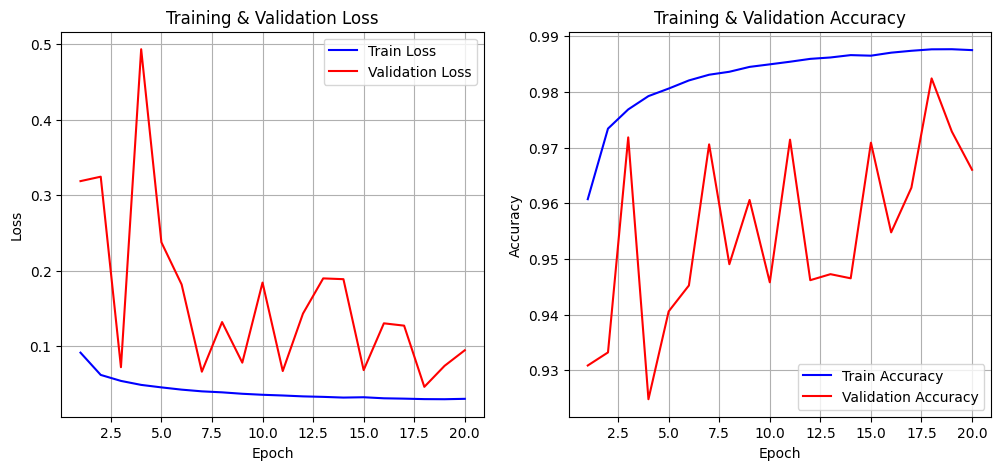

✅ Test Accuracy = 0.9892


In [ ]:

epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'b-', label='Train Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, train_accs, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accs, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()

 

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.long().to(device)
        logits = model(X_batch)
        preds = torch.argmax(logits, dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
test_acc = correct / total
print(f"Test Accuracy = {test_acc:.4f}")
